# **CPE019 : Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN**


---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: May 11, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---


## **Objectives**

This activity aims to prepare a dataset for LSTM and CNN time series forecasting.

## **Intended Learning Outcomes (ILOs):**



 Demonstrate how to prepare a dataset suitable for LSTM and CNN.

## Resources/Files:

- Jupyter Notebook

- [IBM_2006-01-01_to_2018-01-01.csv](https://drive.google.com/file/d/18OU3b5S9vgbbTUDU7IKZRJbI89vxg2Pr/view?usp=sharing)

## **Scenario:**

Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

1. Load the dataset and examine it.
2. Check for missing values.
3. Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

Sample image:

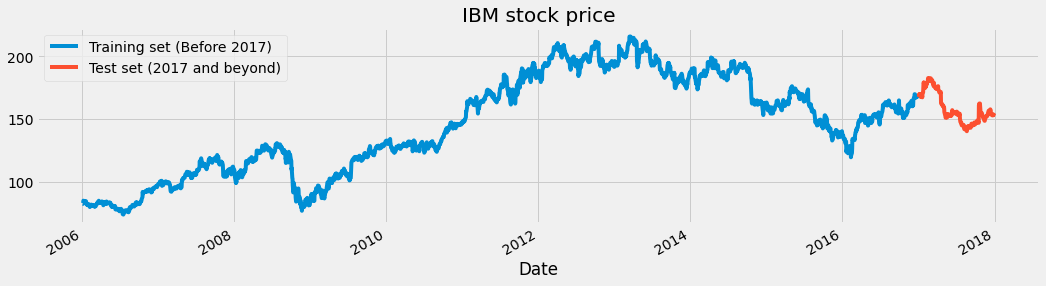

4. Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform 5. function to do this.
5. LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.
6. Reshape the X_train for efficient modeling

# **Activity Proper**

The tasks outlined in the previous section were executed in the following line of codes.

## **Load the dataset and examine it.**

The data was loaded, explored and visualized in this section.

### Importing the CSV File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import read_csv
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/IBM_2006-01-01_to_2018-01-01.csv'

series = read_csv(path, header=0, index_col=0, parse_dates=True)

In [ ]:
#checking each entry
series.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM
2006-01-11,84.37,84.81,83.40,84.17,5776500,IBM
2006-01-12,83.82,83.96,83.40,83.57,4926500,IBM
2006-01-13,83.00,83.45,82.50,83.17,6921700,IBM


In [ ]:
series['Name'].unique()



array(['IBM'], dtype=object)

In [ ]:
series = series.drop('Name',axis = 1)

### **Remarks**

Upon doing some basic exploratory in the dataset, the data set contains the following columns: Date, Open, High, Close, Volume and Name . I noticed that the Name column contains string values that may affect the training in time series. I first check the unique values in the column and all of it are all IBM. Thus, I arbitrarily removed it as all data points have it and will not contribute in the model's performance.

## **Check for missing values**

In [ ]:
#checking for null values
series.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
dtype: int64

In [ ]:
#Checking the shape of the data set
series.shape

(3020, 5)

In [ ]:
#dropping null values

series = series.dropna()

In [ ]:
#Checking the shape of the data set
series.shape

(3019, 5)

### **Remarks**

Upon running the check for null values, there are 1 missing value in Open and Low column. Upon researching, I could either impute the data or simply drop it [1]. In this case, I arbitrarily dropped the data instead of imputing it.



---

Reference:

[1] “How to Deal with Missing Values in a Time Series in Python.” GeeksforGeeks, 07-Feb-2019. [Online]. Available: https://www.geeksforgeeks.org/how-to-deal-with-missing-values-in-a-timeseries-in-python/. [Accessed: 09-May-2024].


## **Splitting the data set**



Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [ ]:
# before 2017
train = series[series.index < '2017-01-01']

# after 2017
test = series[series.index >= '2017-01-01']

In [ ]:
train.shape

(2769, 5)

In [ ]:
test.shape

(250, 5)

In [ ]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


In [ ]:
train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,167.00,167.49,166.45,166.71,1701228
2016-12-27,166.98,167.98,166.85,167.14,1397455
2016-12-28,167.29,167.74,166.00,166.19,1757500
2016-12-29,166.02,166.99,166.00,166.60,1663542
2016-12-30,166.44,166.70,165.50,165.99,2952825


In [ ]:
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299
2017-01-04,167.77,169.87,167.36,169.26,3381432
2017-01-05,169.25,169.39,167.26,168.70,2682301
2017-01-06,168.69,169.92,167.52,169.53,2945536
2017-01-09,169.47,169.80,167.62,167.65,3189891


In [ ]:
test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,167.00,167.87,166.01,167.19,2934299
2017-01-04,167.77,169.87,167.36,169.26,3381432
2017-01-05,169.25,169.39,167.26,168.70,2682301
2017-01-06,168.69,169.92,167.52,169.53,2945536
2017-01-09,169.47,169.80,167.62,167.65,3189891


### **Remarks**

Inorder to satisfy the conditon of having the data set split into before and after 2017, the index of the series which is the date was used as a comparator to the date before and after january 2017. With that, I was able to achieve the splitting of the data set.

### **Visualizing the test and train**

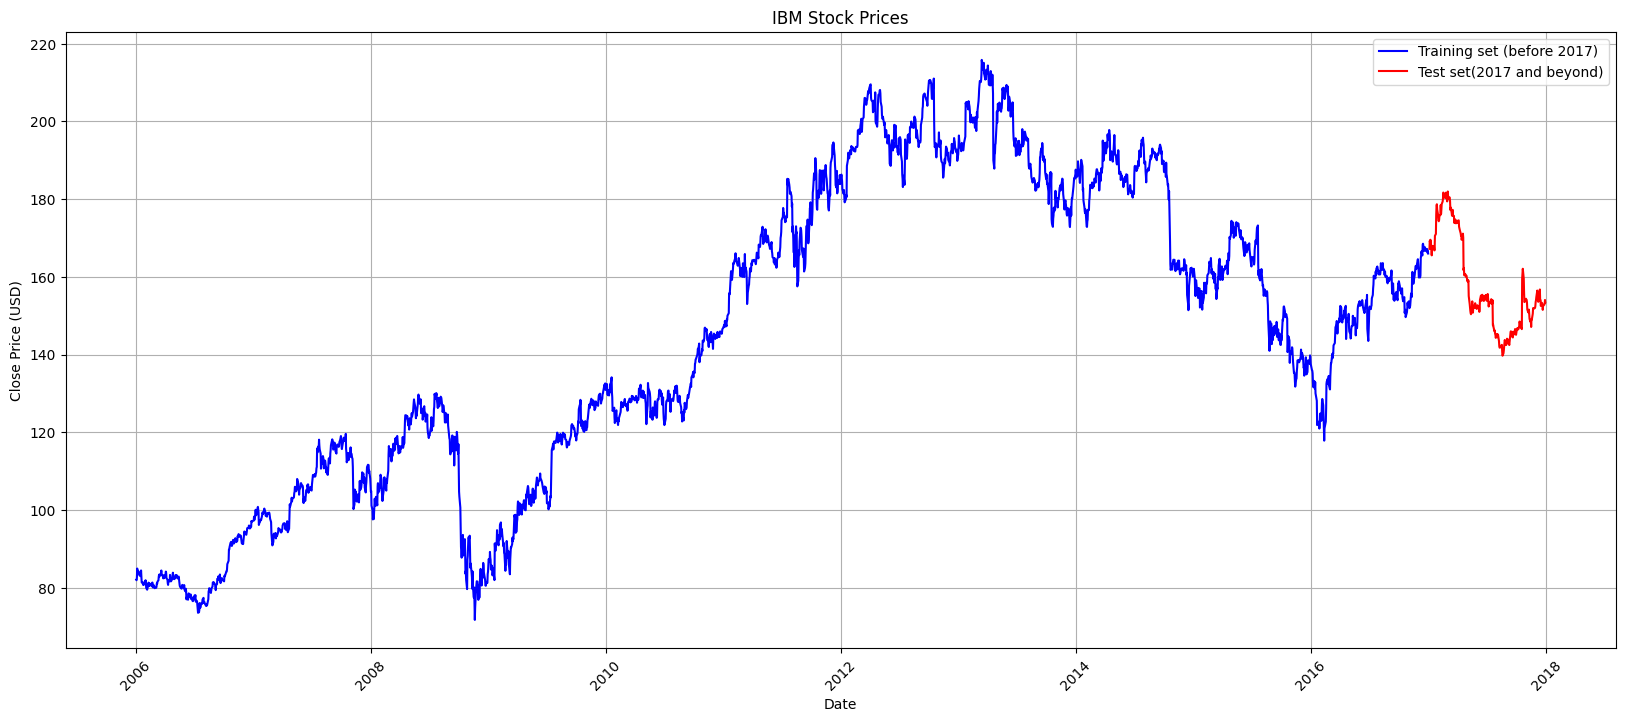

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 8))

# Plot the data set
plt.plot(train['Close'], color='blue',label='Training set (before 2017)')
plt.plot(test['Close'], color='red',label='Test set(2017 and beyond)')


# Setting the ticks of x axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)


plt.grid(True)
plt.legend()
plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')


plt.show()

### **Remarks**

In this code, I reseraeched how can I create a custom tick to have a more readable X axis label. Upon my first trial, all the labels of each point were displayed reducing the readability of the visualization. By using the custom ticks specifically these code:

```
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
```

I was able to create my custom tick and ensure that the x axis scale would be every after 2 years.



---

References for code:

https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html


https://matplotlib.org/stable/gallery/ticks/date_index_formatter.html


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html

## **Scaling the Time series**

Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform 5. function to do this.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

### **Remarks**

The scaling of the data used a MinMaxScaler. MinMaxScaler is a feature scaling where it transforms the input dataframe by scaling each of the feature to a given range [2] in this case, the feature range is 0, 1. After that the fit_transform was used as it is the one responsible for transforming the dataframe, in this case the train dataframe



---

reference:

[2] “sklearn.preprocessing.MinMaxScaler — scikit-learn 0.24.1 documentation,” Scikit-learn. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html. [Accessed: 09-May-2024].

[3] K. Goyal, “Difference Between fit, transform and fit_transform methods in Scikit-Learn with Python Code,” Analytics Vidhya, 08-Apr-2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/04/


## **Create a Sliding window**

LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.


In [ ]:
import numpy as np

X_train = []
y_train = []
timesteps = 60

for i in range(timesteps, len(train_scaled)):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### **Remarks**

As shown in the code above, a datastructure was created with 60 timesteps and 1 output was created. The purpose of this for preparation of data for LSTM and RNN model training. By doing this, each  set timestep(60) will be able to predict a subsequent value (1 output) which is crucial for forecasting as the set of 60 time steps will aid in predicting the next output(forecast)[3][4]


---

[4] S. Jain, “A Comprehensive Guide to Time Series Analysis,” Analytics Vidhya, 11-Oct-2021. [Online]. Available: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/. [Accessed: 09-May-2024].

[5] J. Brownlee, “How to Use Timesteps in LSTM Networks for Time Series Forecasting,” Machine Learning Mastery. [Online]. Available: https://machinelearningmastery.com/use-timesteps-lstm-networks-time-series-forecasting/. [Accessed: 09-May-2024].


---

Reference used for code:

https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn

## **Reshape the X_train for efficient modeling**

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(2709, 60, 1)

### **Remarks:**

In this section, the training data set was reshaped. The purpose of doing this is that to ensure the smooth learning using Kera's LSTM[6]. If this is not done, there is a probability of the model not being able to learn the pattern properly resulting a poor model perforamnce.



---

Reference:

[6] P. Gupta, “Why is Reshaping of Data Important for LSTM Models?” Medium, [Online]. Available: https://medium.com/@palakgupta33939/why-is-reshaping-of-data-important-for-lstm-models-4652332be168. [Accessed: 09-May-2024].


# **Conclusion**

After conducting the activity I was able to learn the how to prepare a dataset suitable for LSTM and CNN. Additonally I conclude the following:

1. Preparation of data is simmular to MLP.
2. Dropping and Imputing data if missing is a case to case basis, in the activity, I chose to drop instead of imputing.
3. Splitting the data set using the index value date was a new learnign for me. I thought that I can only use index numbers to indicate the desired range.
4. Scaling the time series is a necessary step inorder to ensure the range of each features in the same region
5. Sliding windows are helpful in creating a model for forcasting
6. Reshaping the values is necessary to ensure a smooth learning of the model

Overall, the activity was really helpful in imprating the knowledge and skills to preprocess a timeseries data to prepare for LTSM and CNN model training.